# Covid-19: Daily New Cases in Argentina – Test Results

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initialization" data-toc-modified-id="Initialization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization</a></span></li><li><span><a href="#Loading-Predictions-and-Scores" data-toc-modified-id="Loading-Predictions-and-Scores-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading Predictions and Scores</a></span></li><li><span><a href="#Comparison-of-Test-Results" data-toc-modified-id="Comparison-of-Test-Results-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Comparison of Test Results</a></span><ul class="toc-item"><li><span><a href="#Table-of-Models-Scores" data-toc-modified-id="Table-of-Models-Scores-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Table of Models Scores</a></span></li><li><span><a href="#Distributions-of-Models-Errors" data-toc-modified-id="Distributions-of-Models-Errors-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Distributions of Models Errors</a></span></li><li><span><a href="#Models-Predictions-Visualization" data-toc-modified-id="Models-Predictions-Visualization-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Models Predictions Visualization</a></span></li></ul></li></ul></div>

## Initialization

In [2]:
# !pip install --use-feature=in-tree-build psutil requests pmdarima nb_black

In [3]:
# !pip install --use-feature=in-tree-build ../pytorch-fit/
# !pip install --use-feature=in-tree-build git+https://github.com/krzpiesiewicz/pytorch-fit

In [4]:
# !pip install --use-feature=in-tree-build ../timeseries/
# !pip install --use-feature=in-tree-build git+https://github.com/krzpiesiewicz/timeseries

In [5]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2
%aimport timeseries

<IPython.core.display.Javascript object>

In [6]:
import os
import sys
import time
import IPython.display
from pprint import pprint
import matplotlib.colors as mcolors
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

import timeseries as tss
from timeseries import plot_ts
from timeseries.analysis import acf, pacf, plot_hist, plot_acf, plot_pacf, plot_stats
from timeseries.transform import IHSTransformer, get_smoothed
from timeseries.forecast.utils import Results
from timeseries.forecast.utils import (
    plot_model_test_prediction,
    plot_ground_truth,
    plot_hist_model_scores,
)
from timeseries.forecast.scorings import get_comparison_scorings
from timeseries.forecast import average_scores
from timeseries.forecast.hyper_params import (
    make_grid,
    grid_search_hyper_params,
    print_hyper_scores,
    sorted_scores,
)
from timeseries.forecast.models import (
    SarimaModel,
    sarima_model_version,
    sarima_model_version_str,
)

from timeseries_data import Covid19Data

<IPython.core.display.Javascript object>

In [7]:
import nb_black

from notebook_init import notebook_init

notebook_init()

<IPython.core.display.Javascript object>

## Loading Predictions and Scores

In [8]:
scorings = get_comparison_scorings()

ts_data = Covid19Data()
data_type = ts_data.data_type
data_name = ts_data.data_name

test_results = Results(data_type, data_name, "test")

ts = ts_data.ts
train_intv = ts_data.train_interval
val_intv = ts_data.val_interval
test_intv = ts_data.test_interval

<IPython.core.display.Javascript object>

In [9]:
intv = tss.Interval(ts, datetime(2020, 7, 1), datetime(2020, 12, 10))

<IPython.core.display.Javascript object>

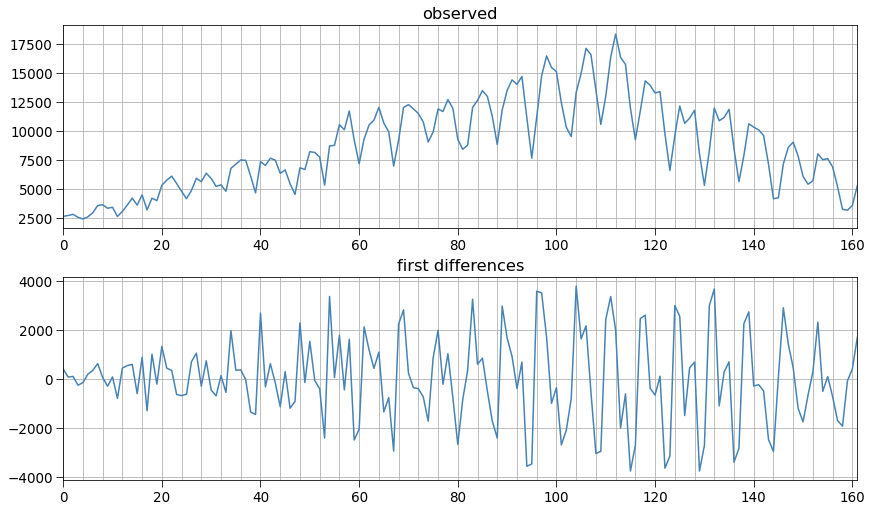

<IPython.core.display.Javascript object>

In [10]:
observed_ts = pd.Series(intv.view(ts), name="observed")
first_diffs = pd.Series(intv.view(ts.diff()), name="first differences")
plot_ts([observed_ts, first_diffs], ax_height=200)

In [40]:
fig = plot_ts(intv.view(ts))
display(fig)

<IPython.core.display.Javascript object>

In [41]:
plot_ts(intv.view(np.log(ts)), name="log of new_cases")

<IPython.core.display.Javascript object>

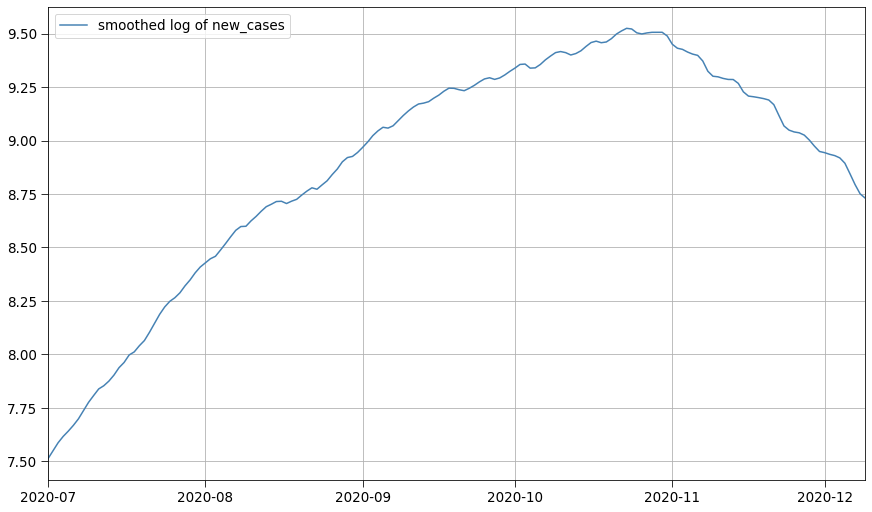

<IPython.core.display.Javascript object>

In [88]:
plot_ts(intv.view(get_smoothed(np.log(ts), std=14)), name="smoothed log of new_cases")

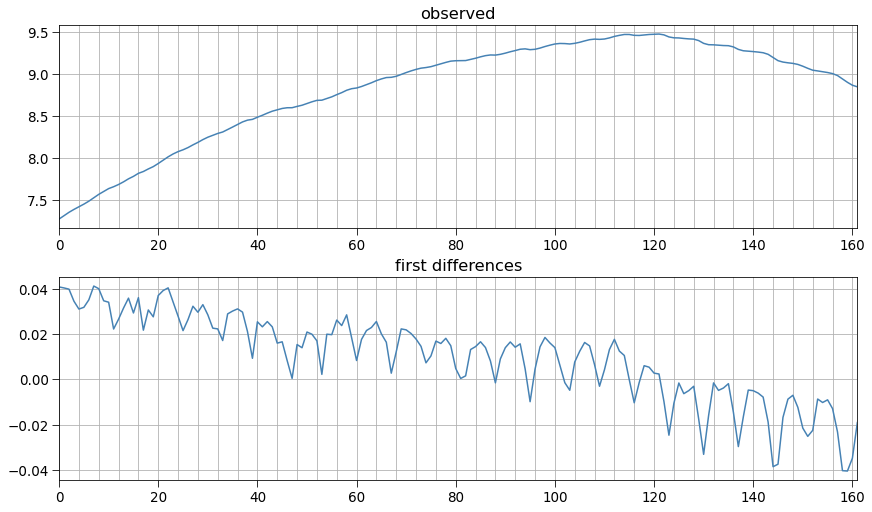

<IPython.core.display.Javascript object>

In [103]:
observed_ts = pd.Series(intv.view(get_smoothed(np.log(ts), std=21)), name="observed")
first_diffs = pd.Series(
    intv.view(get_smoothed(np.log(ts), std=21).diff()), name="first differences"
)
second_diffs = pd.Series(
    intv.view(get_smoothed(np.log(ts), std=21).diff().diff()), name="second differences"
)
plot_ts([observed_ts, first_diffs], ax_height=200)

In [104]:
observed_ts = pd.Series(intv.view(get_smoothed(np.log(ts), std=21)), name="observed")
first_diffs = pd.Series(
    intv.view(get_smoothed(np.log(ts), std=21).diff()), name="first differences"
)
second_diffs = pd.Series(
    intv.view(get_smoothed(np.log(ts), std=21).diff().diff()), name="second differences"
)
plot_ts([first_diffs, second_diffs], ax_height=200)

<IPython.core.display.Javascript object>

In [106]:
second_diffs = pd.Series(
    intv.view(get_smoothed(np.log(ts), std=21).diff().diff()), name="second differences"
)
two_period_diffs = pd.Series(
    intv.view(get_smoothed(np.log(ts), std=21).diff(2)), name="two-period differences"
)
plot_ts([second_diffs, two_period_diffs], ax_height=200)

<IPython.core.display.Javascript object>

In [111]:
second_diffs = pd.Series(
    intv.view(get_smoothed(np.log(ts), std=21).diff().diff()), name="second differences"
)
seven_period_diffs_of_second_diffs = pd.Series(
    intv.view(get_smoothed(np.log(ts), std=21).diff().diff().diff(7)),
    name="seven-period differences of second differences",
)
plot_ts([second_diffs, seven_period_diffs_of_second_diffs], ax_height=200)

<IPython.core.display.Javascript object>

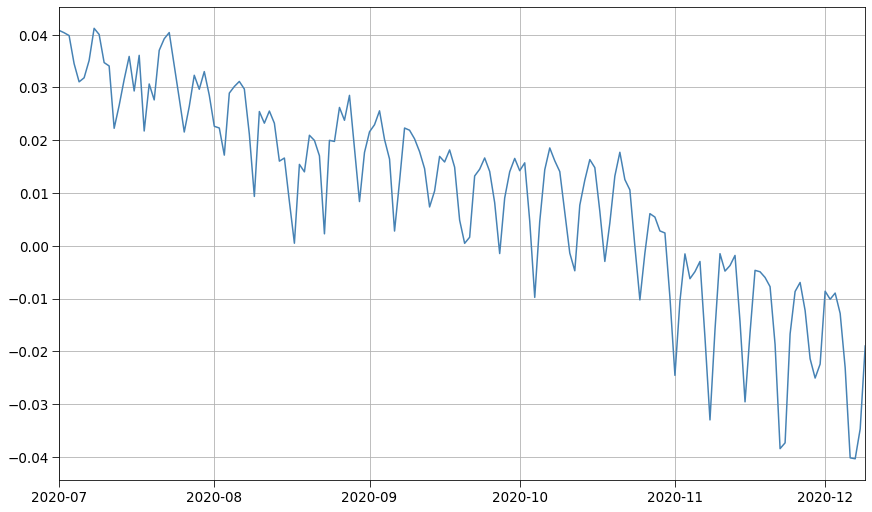

<IPython.core.display.Javascript object>

In [93]:
fig = plot_ts(
    intv.view(get_smoothed(np.log(ts), std=21).diff()),
)
ax = fig.axes[0]
# ax.set_ylim([-0.1, 0.1])
display(fig)

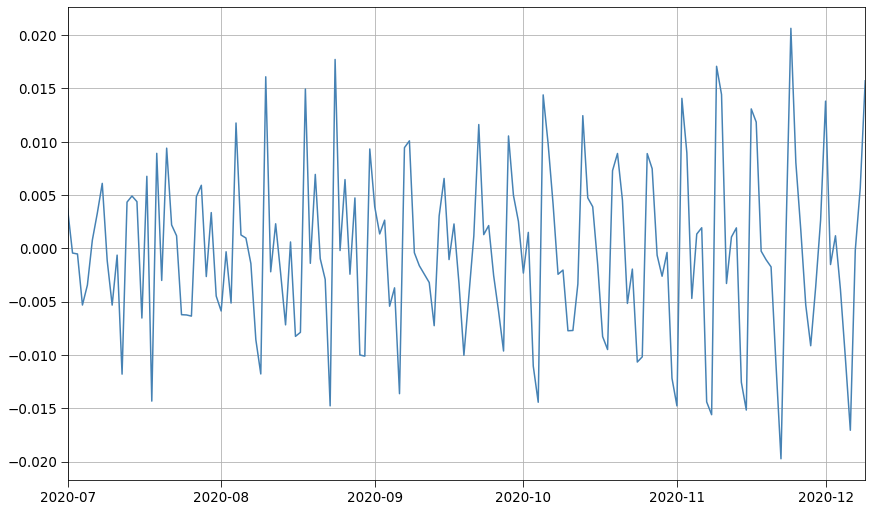

<IPython.core.display.Javascript object>

In [94]:
fig = plot_ts(
    intv.view(get_smoothed(np.log(ts), std=21).diff().diff()),
)
ax = fig.axes[0]
# ax.set_ylim([-0.1, 0.1])
display(fig)

In [60]:
fig = plot_ts(
    intv.view(np.log(ts)).diff(), name="first differences of logarithmic values"
)
ax = fig.axes[0]
ax.set_ylim([-1, 1])
display(fig)

<IPython.core.display.Javascript object>

In [63]:
fig = plot_ts(
    intv.view(np.log(ts)).diff().diff(), name="second differences of logarithmic values"
)
ax = fig.axes[0]
ax.set_ylim([-1, 1])
display(fig)

<IPython.core.display.Javascript object>

In [58]:
fig = plot_ts(
    intv.view(np.log(ts)).diff(), name="first differences of logarithmic values"
)
# plot_ts(
#     intv.view(np.log(ts)).diff(7),
#     name="7-lag differences of logarithmic values",
#     color="tab:orange",
#     fig=fig,
# )
plot_ts(
    intv.view(np.log(ts)).diff().diff(),
    name="second differences of logarithmic values",
    color="tab:orange",
    fig=fig,
)
display(fig)

<IPython.core.display.Javascript object>

In [10]:
models = [
    ("Median of Medians", "(1,1)[7]"),
    ("SARIMA", "(0,0,1)(1,0,1)[7]"),
    ("SARIMA", "(0,0,1)(1,0,2)[7] with IHS"),
]
test_preds = {}
test_scores = {}
for model, version in models:
    test_results.set_model(model, version)
    test_results.load_model_preds()
    test_results.load_model_scores()
    test_preds[(model, version)] = test_results.get_model_preds()
    test_scores[(model, version)] = test_results.get_model_scores()
    test_results.add_model_scores(all_scores=test_results.get_model_scores())

<IPython.core.display.Javascript object>

In [8]:
fig = plot_ts(ts, color="lightgrey")
plot_ts(train_intv.view(ts), color="tab:green", fig=fig)
plot_ts(val_intv.view(ts), color="tab:orange", fig=fig)
plot_ts(test_intv.view(ts), color="tab:red", fig=fig)
display(fig)

<IPython.core.display.Javascript object>

## Comparison of Test Results

### Table of Models Scores

In [11]:
display(test_results.scores_table())

Model                     Version         RMSE          MAE  \
0  Median of Medians                    (1,1)[7]  5531.586267  4709.434319   
1             SARIMA           (0,0,1)(1,0,1)[7]  4940.864531  4156.191831   
2             SARIMA  (0,0,1)(1,0,2)[7] with IHS  4807.306996  4126.729547   

       MASE      sMAPE  
0  1.079268  21.698733  
1  0.932478  19.254750  
2  0.947580  20.850484

<IPython.core.display.Javascript object>

### Distributions of Models Errors

In [12]:
scoring_name = "MAE"
data_fig_name = f"{data_type}: {data_name}"
kwargs = dict(
    title=f"{data_fig_name} – Test Distribution of {scoring_name}", engine="plotly"
)
fig = None
for ((model, version), scores), color in zip(
    test_scores.items(), mcolors.TABLEAU_COLORS
):
    fig = plot_hist(
        scores[scoring_name],
        name=f"{model} {version}",
        color=color,
        fig=fig,
        **kwargs,
    )
    kwargs = {}
display(fig)

<IPython.core.display.Javascript object>

### Models Predictions Visualization

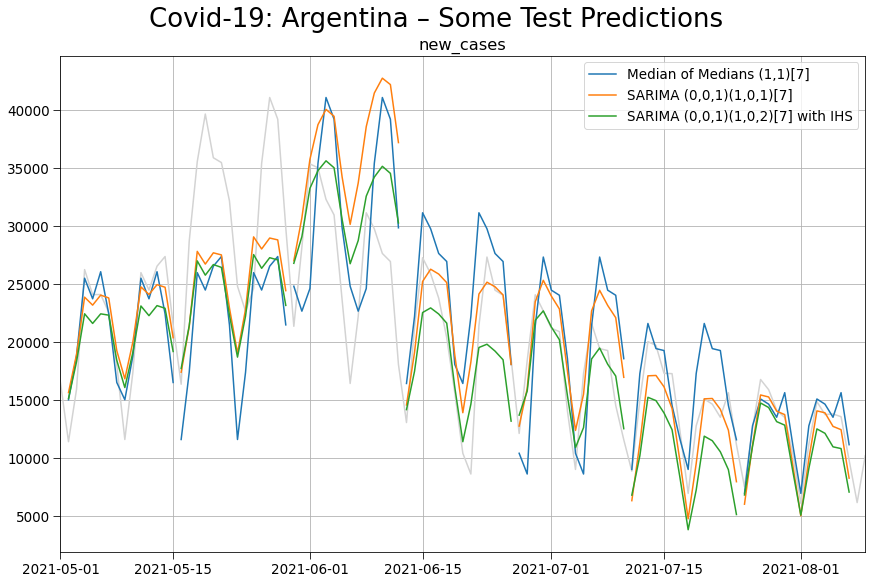

<IPython.core.display.Javascript object>

In [13]:
fig_time_delta = timedelta(days=1)
fig = plot_ground_truth(
    test_intv, mode="test", data_type=data_type, data_name=data_name, color="lightgrey"
)
for ((model, version), preds), color in zip(test_preds.items(), mcolors.TABLEAU_COLORS):
    plot_model_test_prediction(
        test_intv,
        fig_time_delta,
        preds,
        model_name=model,
        model_version=version,
        fig=fig,
        color=color,
    )

display(fig)